In [30]:
'''# Titanic Survival Prediction – Exploratory Data Analysis (EDA)

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset.
The objective is to understand survival patterns based on passenger attributes
such as gender, age, passenger class, and fare.

This analysis helps in feature selection and model design.'''


'# Titanic Survival Prediction – Exploratory Data Analysis (EDA)\n\nThis notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset.\nThe objective is to understand survival patterns based on passenger attributes\nsuch as gender, age, passenger class, and fare.\n\nThis analysis helps in feature selection and model design.'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [32]:
df = pd.read_csv("/content/train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
'''### Missing Values Observations

- **Age** has missing values → will require imputation.
- **Cabin** has many missing values → will be dropped.
- **Embarked** has very few missing values → can be filled using mode.

These decisions will be handled during data preprocessing.'''


'### Missing Values Observations\n\n- **Age** has missing values → will require imputation.\n- **Cabin** has many missing values → will be dropped.\n- **Embarked** has very few missing values → can be filled using mode.\n\nThese decisions will be handled during data preprocessing.'

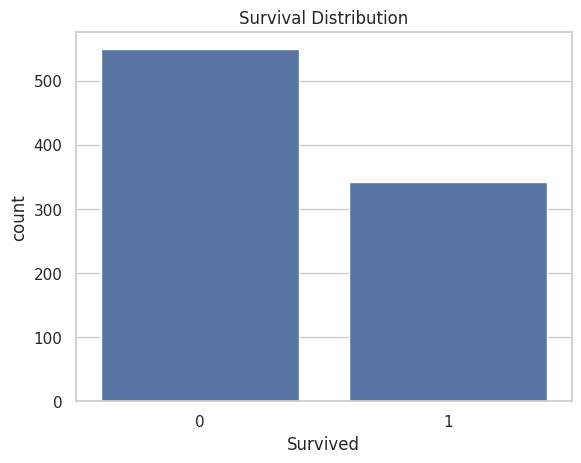

In [36]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.show()


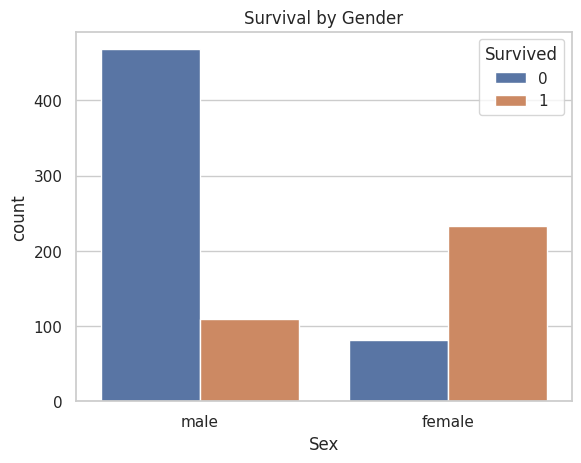

In [37]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


In [38]:
'''### Insight: Gender vs Survival

- Females had a significantly higher survival rate than males.
- This indicates gender is a strong predictive feature.'''


'### Insight: Gender vs Survival\n\n- Females had a significantly higher survival rate than males.\n- This indicates gender is a strong predictive feature.'

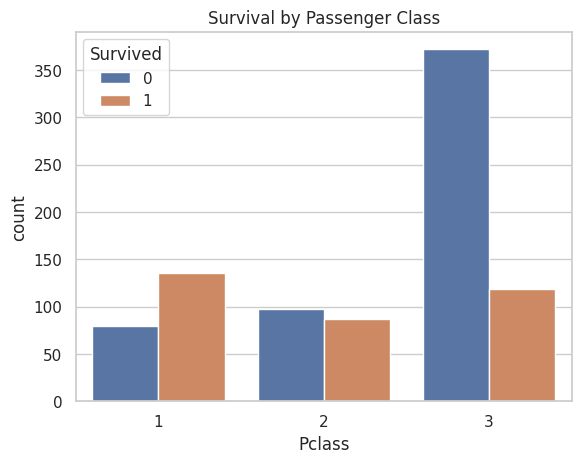

In [39]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [40]:
'''### Insight: Passenger Class vs Survival

- First-class passengers had the highest survival rate.
- Third-class passengers had the lowest survival rate.
- Passenger class strongly influences survival probability.'''


'### Insight: Passenger Class vs Survival\n\n- First-class passengers had the highest survival rate.\n- Third-class passengers had the lowest survival rate.\n- Passenger class strongly influences survival probability.'

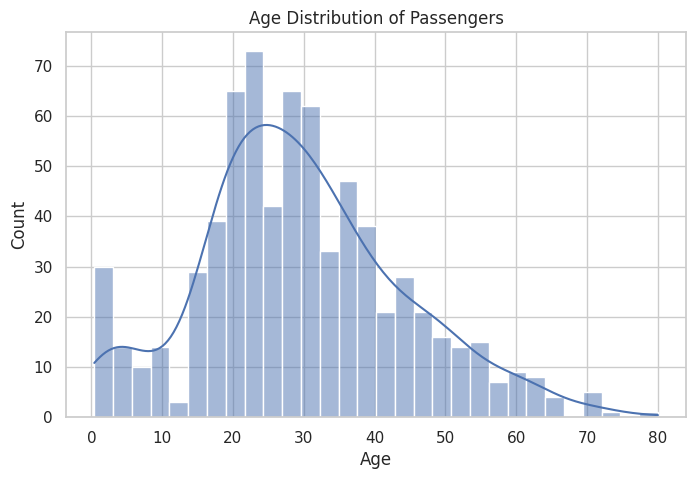

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


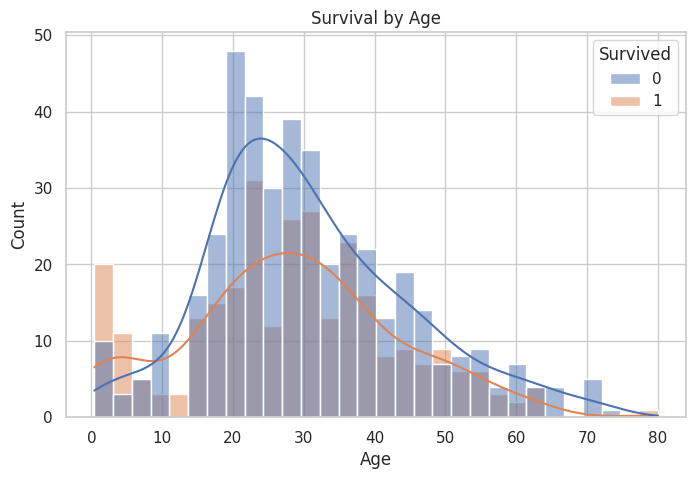

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Survival by Age")
plt.show()


In [43]:
'''### Insight: Age vs Survival

- Children had relatively higher survival rates.
- Older passengers had lower survival probability.
- Age is an important continuous feature.'''


'### Insight: Age vs Survival\n\n- Children had relatively higher survival rates.\n- Older passengers had lower survival probability.\n- Age is an important continuous feature.'

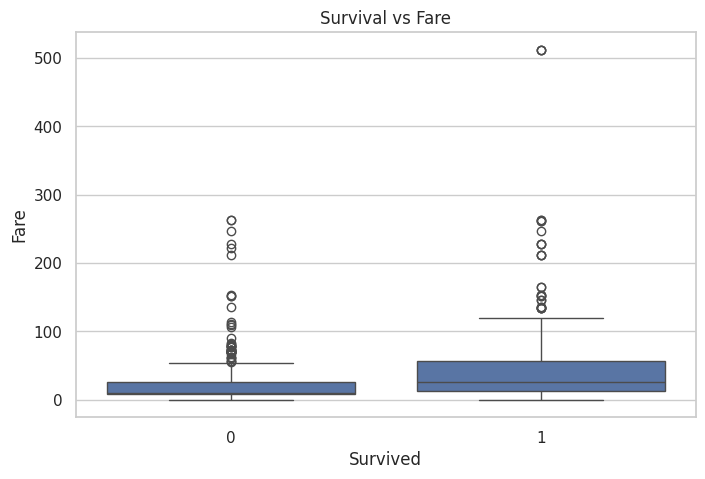

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Survival vs Fare")
plt.show()


In [45]:
'''### Insight: Fare vs Survival

- Passengers who paid higher fares were more likely to survive.
- Fare indirectly reflects passenger class and access to lifeboats.'''


'### Insight: Fare vs Survival\n\n- Passengers who paid higher fares were more likely to survive.\n- Fare indirectly reflects passenger class and access to lifeboats.'

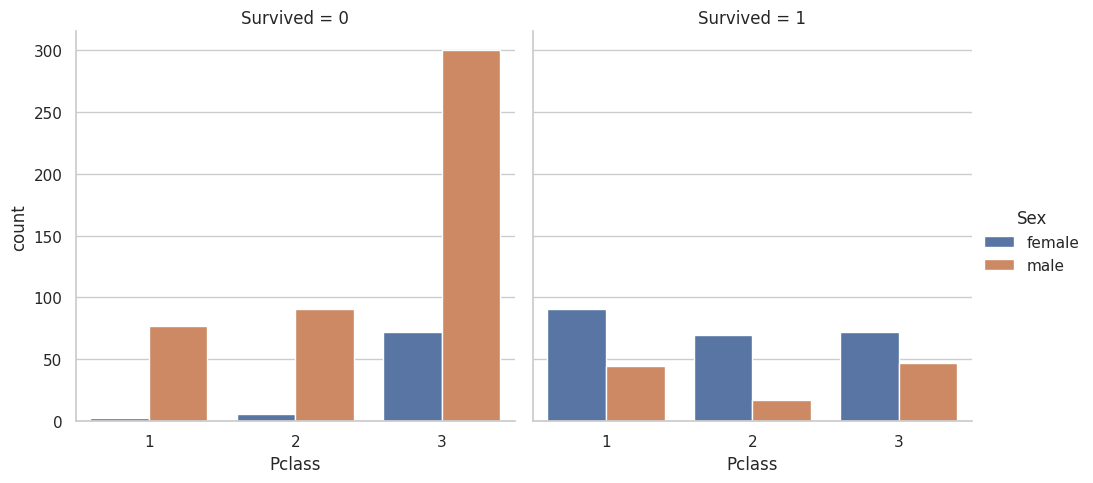

In [46]:
sns.catplot(
    x="Pclass",
    hue="Sex",
    col="Survived",
    data=df,
    kind="count"
)
plt.show()


In [47]:
'''### Feature Interaction Insight

- Female passengers in 1st and 2nd class had very high survival rates.
- Male passengers in 3rd class had the lowest survival rates.
- Interaction between gender and class is critical for prediction.'''


'### Feature Interaction Insight\n\n- Female passengers in 1st and 2nd class had very high survival rates.\n- Male passengers in 3rd class had the lowest survival rates.\n- Interaction between gender and class is critical for prediction.'

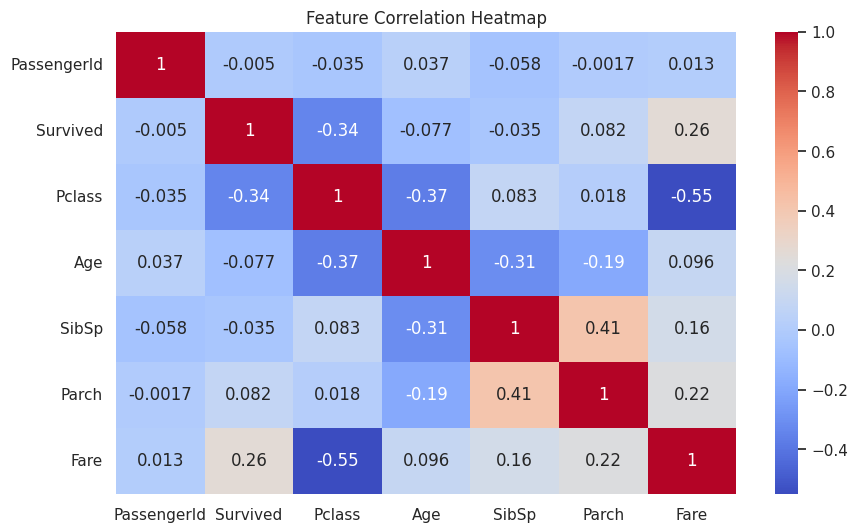

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
'''### EDA Summary

Key findings from exploratory data analysis:

- Gender and passenger class are the strongest predictors of survival.
- Age and fare also influence survival probability.
- Feature interactions (Gender × Class) reveal important patterns.
- These insights guide feature engineering and model selection.

EDA confirms the need for engineered features such as FamilySize and Title.'''


'### EDA Summary\n\nKey findings from exploratory data analysis:\n\n- Gender and passenger class are the strongest predictors of survival.\n- Age and fare also influence survival probability.\n- Feature interactions (Gender × Class) reveal important patterns.\n- These insights guide feature engineering and model selection.\n\nEDA confirms the need for engineered features such as FamilySize and Title.'